# The Divergence in the School of Athens 


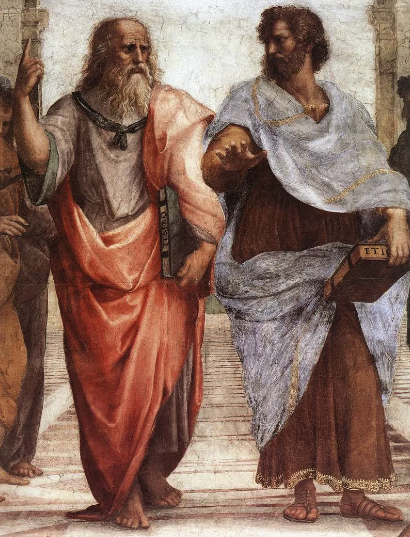

   One of the most famous frescoes in the entire world is the School of Athens. It is a Renaissance masterpiece created by Raphael between 1509 and 1511 and features the famous philosophers of the classical age. Even though there is a lot to discuss in this fresco, I want to draw your attention to the two main figures (picture above) : Plato pointing to the skies and his student Aristotle pointing in the earthward direction.
   One of the most famous frescoes in the entire world is the School of Athens. It is a Renaissance masterpiece created by Raphael between 1509 and 1511 and features the famous philosophers of the classical age. Even though there is a lot to discuss in this fresco, I want to draw your attention to the two main figures (picture above) : Plato pointing to the skies and his student Aristotle pointing in the earthward direction.
	
   Why did Raphael depict them like this? According to Plato, the real world—the one made of material things—is but a shadow of the ideal one. An imperfect mirror of the ideal apple, for instance, can be seen in the imperfect apple that exists in the real world. Plato calls these perfect or ideal things their Forms, hence his theory of Forms. Theory of Forms is not limited to objects, we can also talk about the Form of education, the Form of friendship and so on. Contrary to his teacher, Aristotle asserts that the material world is real. He thinks that the Form is located in the physical world, inside the object in question. There cannot be an apple without applehood.
    
   You may now be able to understand what Raphael was trying to express. Plato gestures to the skies because he thought the Forms existed in another realm, while Aristotle points to the earth because he thought Forms existed in the real world.
    
   The main difference between Plato and Aristotle philosophy is that the philosophy of Plato is more theoretical and abstract in nature, whereas the philosophy of Aristotle is more practical and experimental in nature. This analysis is conducted to identify the divergences between these two philosophers through their writings. 

## EDA (Exploratory Data Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
from sklearn.cluster import k_means
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import warnings
from nrclex import NRCLex
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../data/philosophy_data.csv")
author = ['Plato', 'Aristotle']
data_filtered = data[data["author"].isin(author)]
data_filtered.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


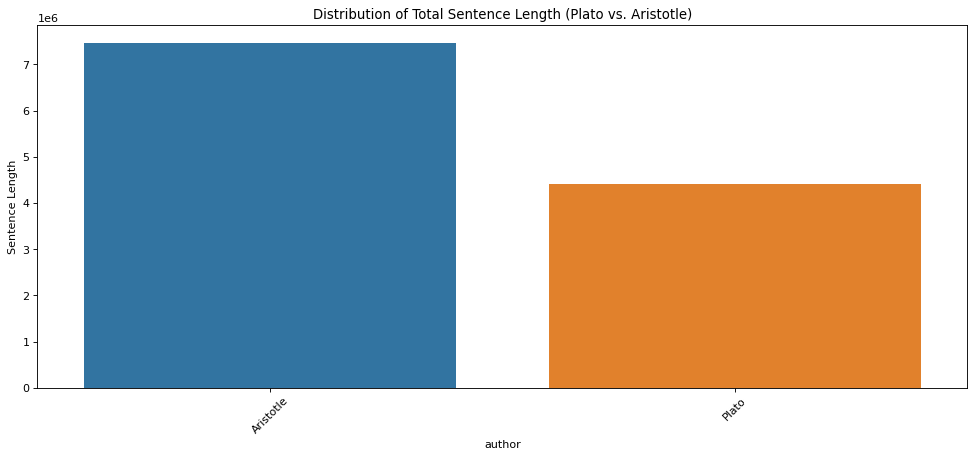

In [4]:
author_length = data_filtered.groupby("author").sum("sentence_length").sort_values(by=['sentence_length'], ascending = False)
author_length["author"] = list(author_length.index)
figure(figsize=(15, 6), dpi=80)
sns.barplot(data = author_length, x = "author", y = "sentence_length")
plt.xticks(rotation=45)
plt.ylabel("Sentence Length")
plt.title("Distribution of Total Sentence Length (Plato vs. Aristotle)")
plt.show()

From the distribution of total sentence length, we can see that Aristotle has more length compared to Plato. From his works, it is said that Aristotle tends to challenge what his teacher has said, so it is common for him to have more sentences.

School =  PLATO :


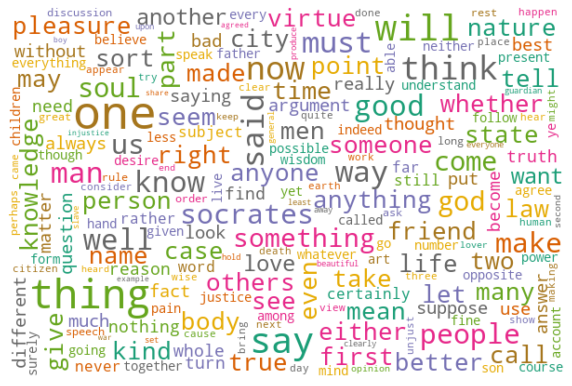

School =  ARISTOTLE :


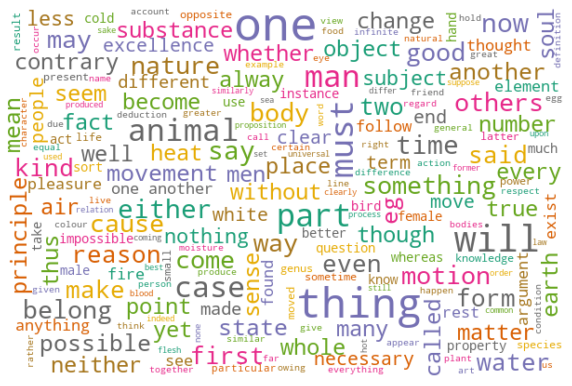

In [7]:
stopwords = set(STOPWORDS)
schools = data_filtered.school.unique().tolist()

for sc in schools:
    data_temp = data_filtered[data_filtered.school==sc]  
    print('School = ', sc.upper(), ':')   
    # render wordcloud
    text = " ".join(txt for txt in data_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=200,
                          width = 600, height = 400,colormap="Dark2",
                          background_color="white").generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

What words did Aristotle and Plato use most often in their respective works? <br>
Aristotle is a realist, so his words are more science and object focused ("animal, body, substance, movement) while Plato is an idealist, his words are more related to wisdom ("virtue", "god", "think","knowledge")

## Sentiment Analysis

I use the sentiment analysis to determine the emotion for each of their works, but mainly to identify Aristotle's emotion towards Plato and prove how much he mentions his teacher in his works. 

In [9]:
#Define data back to df for functionality and reproduceability 
df = data_filtered
#NRCLex will measure emotional affect from a body of text
import time
start_time = time.time()
senti_list = []
for i in range(len(df.sentence_lowered)):
    senti_list.append(NRCLex(df.sentence_lowered[i]))

In [10]:
#Detailing of emotions generated by NRClex
senti_detail = [senti_list[i].affect_frequencies for i in range(len(senti_list))]
fear = [senti_detail[i]["fear"] for i in range(len(senti_detail))]
anger = [senti_detail[i]["anger"] for i in range(len(senti_detail))]
anticip = [senti_detail[i]["anticip"] for i in range(len(senti_detail))]
trust = [senti_detail[i]["trust"] for i in range(len(senti_detail))]
surprise = [senti_detail[i]["surprise"] for i in range(len(senti_detail))]
positive = [senti_detail[i]["positive"] for i in range(len(senti_detail))]
negative = [senti_detail[i]["negative"] for i in range(len(senti_detail))]
sadness = [senti_detail[i]["sadness"] for i in range(len(senti_detail))]
disgust = [senti_detail[i]["disgust"] for i in range(len(senti_detail))]
joy = [senti_detail[i]["joy"] for i in range(len(senti_detail))]

In [11]:
df["fear"] = fear
df["anger"] = anger
df["anticip"] = anticip
df["trust"] = trust
df["surprise"] = surprise
df["positive"] = positive
df["negative"] = negative
df["sadness"] = sadness
df["disgust"] = disgust
df["joy"] = joy

In [12]:
df.head(5)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,...,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...",...,0.10,0.1,0.0,0.1,0.1,0.2,0.1,0.1,0.00,0.0
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",...,0.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.25,0.0
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...",...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [13]:
#Group by the sentences by their school (Plato and Aristotle)
school_list = list(df.school.value_counts().index)
senti_types = ["fear","anger","anticip","trust","surprise","sadness","disgust","joy"]
school_group = df.groupby("school").mean(senti_types)

We want to know how many times Aristotle mentions his teacher Plato throughout his writings and whether that sentence has a positive sentiment or not. 

In [14]:
count_lists = []
sentiment_lists = []
for school_1 in school_list:
    count_list = []
    sentiment_list = []
    school_1_data = df[df.school == school_1].reset_index()
    for school_2 in school_list:
        count = 0
        positive = 0
        for i in range(school_1_data.shape[0]):
            if (school_1_data.sentence_lowered[i].find(school_2) != -1):
                count += 1
                if school_1_data.positive[i] > school_1_data.negative[i]:
                    positive += school_1_data.positive[i]
                elif school_1_data.positive[i] == school_1_data.negative[i]:
                    positive += 0
                else:
                    positive -= school_1_data.negative[i]
        count_list.append(count)
        sentiment_list.append(positive)
    count_lists.append(count_list)
    sentiment_lists.append(sentiment_list)

In [15]:
mention_df = pd.DataFrame(count_lists)
mention_df.columns = school_list
mention_df.index = school_list
mention_df['sum'] = mention_df.apply(sum, axis = 1)
mention_df.loc['sum',:] = mention_df.apply(sum, axis = 0)
mention_df

,aristotle,plato,sum
aristotle,0.0,74.0,74.0
plato,0.0,30.0,30.0
sum,0.0,104.0,104.0


Turns out, Aristotle really did mention Plato a lot by 74 times throughout his works. 

<AxesSubplot:>

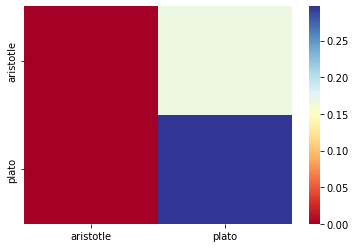

In [16]:
positive_df = pd.DataFrame(sentiment_lists)
positive_df.columns = school_list 
positive_df.index = school_list 
for i in range(positive_df.shape[0]):
    for j in range(positive_df.shape[1]):
        if mention_df.iloc[i,j] >= 10:
            positive_df.iloc[i,j] = positive_df.iloc[i,j]/mention_df.iloc[i,j]
        else:
            positive_df.iloc[i,j] = 0
sns.heatmap(positive_df, cmap="RdYlBu")